# Probability Distributions in Python Tutorial
**In this tutorial, you'll learn about and how to code in Python the probability distributions commonly referenced in machine learning literature.**

## Introduction

Probability and Statistics are the foundational pillars of Data Science. In fact, the underlying principle of machine learning and artificial intelligence is nothing but statistical mathematics and linear algebra. Often you will encounter situations, especially in Data Science, where you have to read some research paper which involves a lot of maths in order to understand a particular topic and so if you want to get better at Data Science, it's imperative to have a strong mathematical understanding. This tutorial is about commonly used probability distributions in machine learning literature. If you are a beginner, then this is the right place for you to get started. In this tutorial, you'll:

- Learn about probability jargons like random variables, density curve, probability functions, etc.
- Learn about different probability distributions and their distribution functions along with some of their properties.
- Learn to create and plot these distributions in python.

Before getting started, you should be familiar with some mathematical terminologies which is what the next section covers.

## Random Variable

A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

A **discrete random variable** is one which may take on only a countable number of distinct values and thus can be quantified. For example, you can define a random variable $X$ to be the number which comes up when you roll a fair dice. $X$ can take values : $[1,2,3,4,5,6]$ and therefore is a discrete random variable.

The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values. It is also sometimes called the **probability function** or the probability mass function. To have a mathematical sense, suppose a random variable $X$ may take $k$ different values, with the probability that $X = x_{i}$ defined to be $P(X = x_{i}) = p_{i}$. Then the probabilities $p_{i}$ must satisfy the following:

1: 0 < $p_{i}$ < 1 for each $i$

2: $p_{1} + p_{2} + ... + p_{k} = 1$.

Some examples of discrete probability distributions are Bernoulli distribution, Binomial distribution, Poisson distribution etc.

A **continuous random variable** is one which takes an infinite number of possible values. For example, you can define a random variable $X$ to be the height of students in a class. Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral).

The probability distribution of a continuous random variable, known as **probability distribution functions**, are the functions that take on continuous values. The probability of observing any single value is equal to $0$ since the number of values which may be assumed by the random variable is infinite.
For example, a random variable $X$ may take all values over an interval of real numbers. Then the probability that $X$ is in the set of outcomes $A, P(A)$, is defined to be the area above $A$ and under a curve. The curve, which represents a function $p(x)$, must satisfy the following:

1: The curve has no negative values $(p(x) > 0$ for all $x$)

2: The total area under the curve is equal to $1$.

A curve meeting these requirements is often known as a **density curve**. Some examples of continuous probability distributions are normal distribution, exponential distribution, beta distribution, etc.

There’s another type of distribution that often pops up in literature which you should know about called **cumulative distribution function**. All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable $X$ is less than or equal to $x$, for every value $x$. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities.

In the next section, you will explore some important distributions and try to work them out in python but before that import all the necessary libraries that you'll use.


In [19]:
# for inline plots in jupyter
%matplotlib inline

# import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [8, 4]
plt.style.use(['seaborn-darkgrid'])

In [20]:
# import seaborn
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(8,4)})

## 1. Uniform Distribution

Perhaps one of the simplest and useful distribution is the uniform distribution. The probability distribution function of the continuous uniform distribution is:


$$
\begin{equation}
  f(x) =
    \begin{cases}
      \frac{1}{b-a} & \text{for} \ a \leq x \leq b, \\
      0  & \text{for} \ x < a \ \text{or} \ x > b
    \end{cases}       
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. The following figure shows a uniform distribution in interval (a,b). Notice since the area needs to be $1$. The height is set to $1/(b-a)$.


![](graphics/figure1.png)

You can visualize uniform distribution in python with the help of a random number generator acting over an interval of numbers (a,b). You need to import the `uniform` function from `scipy.stats` module.


In [21]:
# import uniform distribution
from scipy.stats import uniform

The `uniform` function generates a uniform continuous variable between the specified interval via its `loc` and `scale` arguments. This distribution is constant between `loc` and `loc + scale`. The `size` arguments describe the number of random variates. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [22]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

You can use Seaborn’s `distplot` to plot the histogram of the distribution you just created. Seaborn’s distplot takes in multiple arguments to customize the plot. You first create a plot object `ax`. Here, you can specify the number of `bins` in the histogram, specify the `color` of the histogram and specify density plot option with `kde` and linewidth option with `hist_kws`. You can also set labels for x and y axis using the `xlabel` and `ylabel` arguments.


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

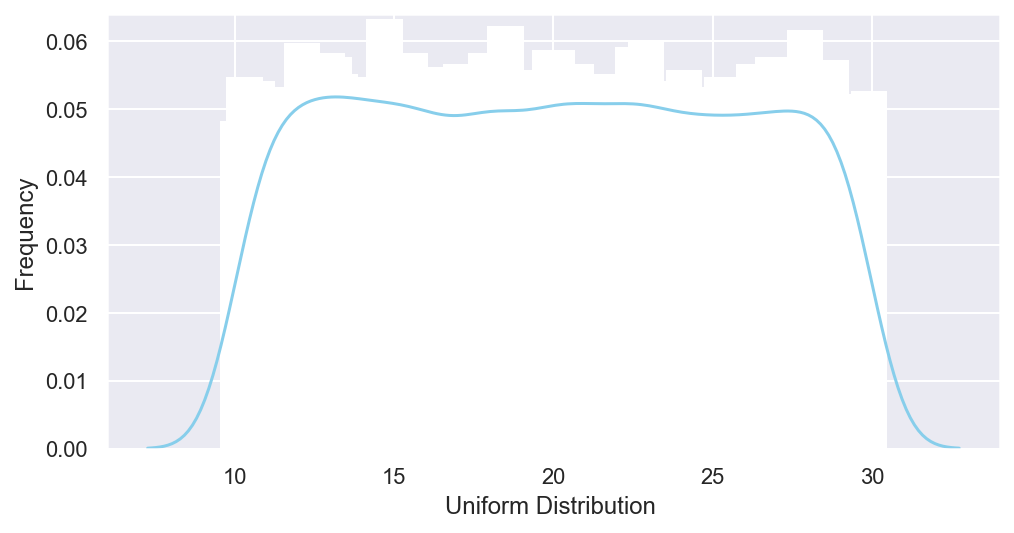

In [23]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## 2. Normal Distribution

Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean $μ$ and standard deviation $σ$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean $μ$ and standard deviation $σ$ at a given point $x$ is given by:


$$
f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Below is the figure describing what the distribution looks like:



![](graphics/figure2.png)


Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also it worth mentioning that a distribution with mean $0$ and standard deviation $1$ is called a **standard normal distribution**.

You can generate a normally distributed random variable using `scipy.stats` module's `norm.rvs()` method. The `loc` argument corresponds to the mean of the distribution. `scale` corresponds to standard deviation and `size` to the number of random variates. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [24]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

You can visualize the distribution just like you did with the uniform distribution, using seaborn's `distplot` functions. The meaning of the arguments remains the same as in the last case.


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

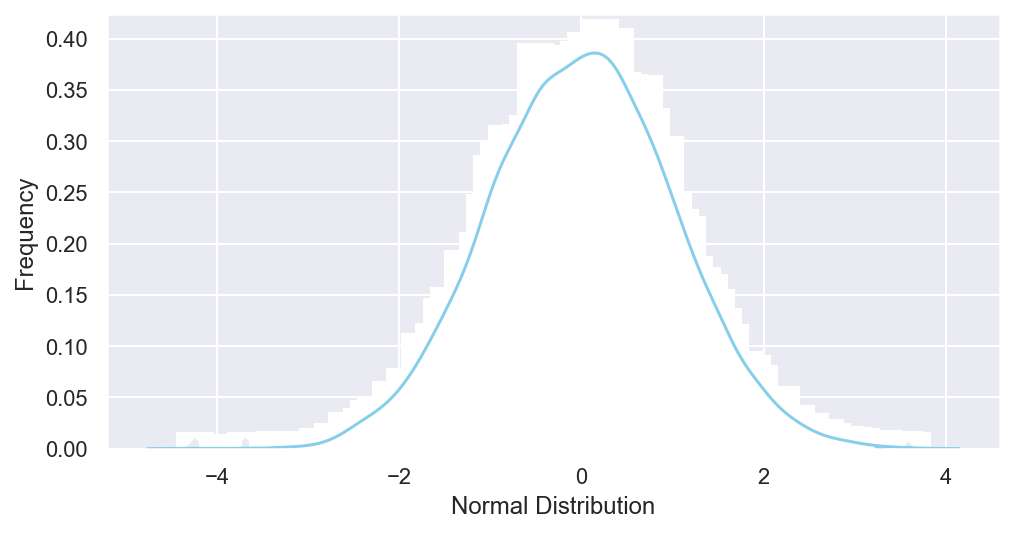

In [25]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## 3. Gamma Distribution

The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a shape parameter $α = k$ and an inverse scale parameter $β = 1/θ$, called a rate parameter., the symbol $Γ(n)$ is the gamma function and is defined as $(n-1)!$ :


$$
f(x;\alpha, \beta) = \frac{\beta^\alpha x^{\alpha -1}e^{-\beta x}}{\Gamma(a)} \quad \text{for} \ x > 0 \ \text{and} \ \alpha, \beta > 0,
$$

A typical gamma distribution looks like:


![](graphics/figure3.png)


You can generate a gamma distributed random variable using `scipy.stats` module's `gamma.rvs()` method which takes shape parameter $a$ as its argument. When $a$ is an integer, gamma reduces to the Erlang distribution, and when $a=1$ to the exponential distribution. To shift distribution use the `loc` argument, to scale use `scale` argument, `size` decides the number of random variates in the distribution. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [26]:
from scipy.stats import gamma

data_gamma = gamma.rvs(a=5, size=10000)

You can visualize the distribution just like you did with the uniform distribution, using seaborn's `distplot` functions. The meaning of the arguments remains the same as explained in the uniform distribution section.


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

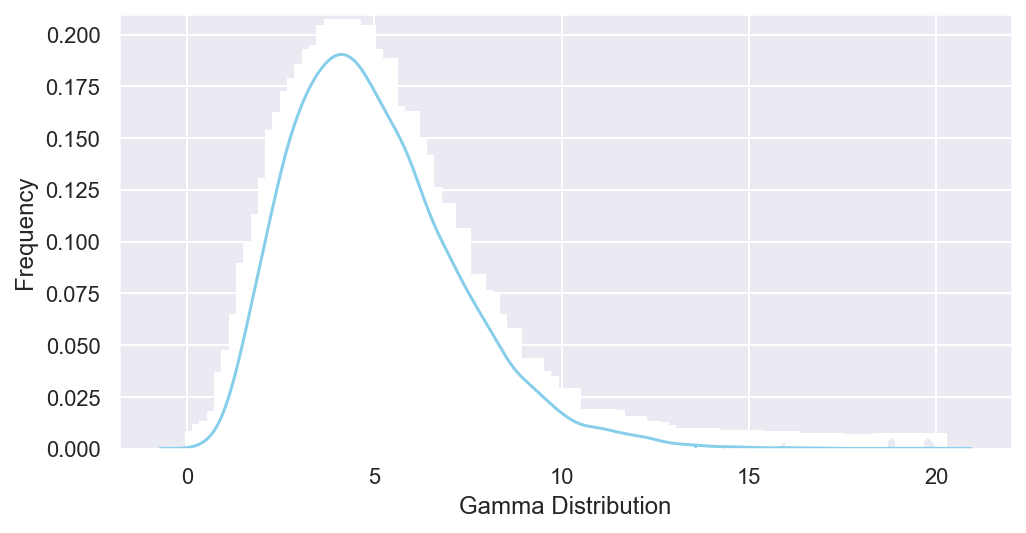

In [27]:
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## 4. Exponential Distribution

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter $λ$ called rate parameter, and its equation is described as :


$$
f(x;\lambda)=
    \begin{cases}
        \lambda e^{-\lambda x} & x \geq 0, \\
        0 & x < 0
    \end{cases}
$$

A decreasing exponential distribution looks like :


![](graphics/figure4.png)

You can generate an exponentially distributed random variable using `scipy.stats` module's `expon.rvs()` method which takes shape parameter `scale` as its argument which is nothing but `1/lambda` in the equation. To shift distribution use the `loc` argument, `size` decides the number of random variates in the distribution. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [28]:
from scipy.stats import expon

data_expon = expon.rvs(scale=1,loc=0,size=1000)

Again visualizing the distribution with seaborn yields the curve shown below:


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

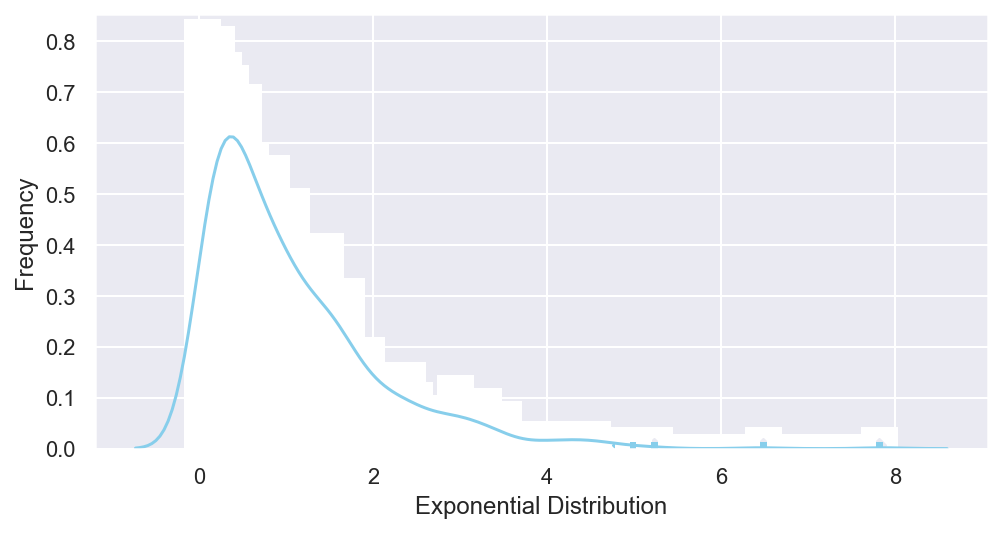

In [29]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## 5. Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate ($μ$) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $λ$ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing $k$ events in an interval is given by the equation:


$$
P(k \ \text{events in interval}) = \frac{\lambda^k}{k!} e^{-\lambda} 
$$

**Note** that the normal distribution is a limiting case of Poisson distribution with the parameter $λ →∞$. Also, if the times between random events follow an exponential distribution with rate $λ$, then the total number of events in a time period of length $t$ follows the Poisson distribution with parameter $λt$.  

The following figure shows a typical poisson distribution:


![](graphics/figure5.png)

You can generate a poisson distributed discrete random variable using `scipy.stats` module's `poisson.rvs()` method which takes $μ$ as a shape parameter and is nothing but the $λ$ in the equation. To shift distribution use the `loc` parameter. `size` decides the number of random variates in the distribution. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [30]:
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)

You can visualize the distribution just like you did with the uniform distribution, using seaborn's `distplot` functions. The meaning of the arguments remains the same.


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

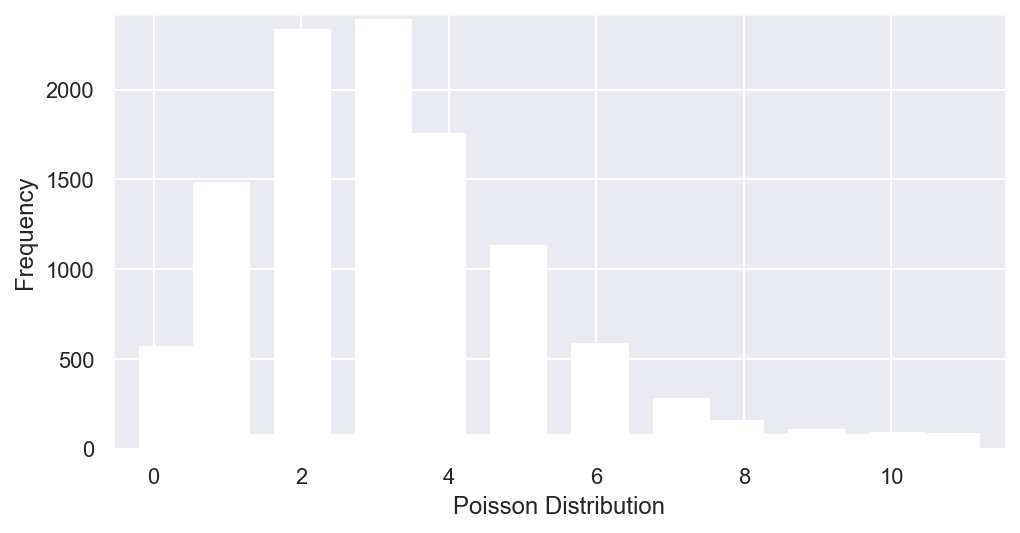

In [31]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## 6. Binomial Distribution

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution. However, The outcomes need not be equally likely, and each trial is independent of each other. The parameters of a binomial distribution are $n$ and $p$ where $n$ is the total number of trials, and $p$ is the probability of success in each trial. Its probability distribution function is given by :


$$f(k,n,p) = Pr(k; n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}$$

where :


$$
{n \choose k} = \frac{n!}{k!(n-k)!}
$$

You can generate a binomial distributed discrete random variable using `scipy.stats` module's `binom.rvs()` method which takes $n$ (number of trials) and $p$ (probability of success) as shape parameters. To shift distribution use the `loc` parameter. `size` decides the number of times to repeat the trials. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [32]:
from scipy.stats import binom

data_binom = binom.rvs(n=10,p=0.8,size=10000)

Visualizing the distribution you just created using seaborn's `distplot` renders the following histogram:


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

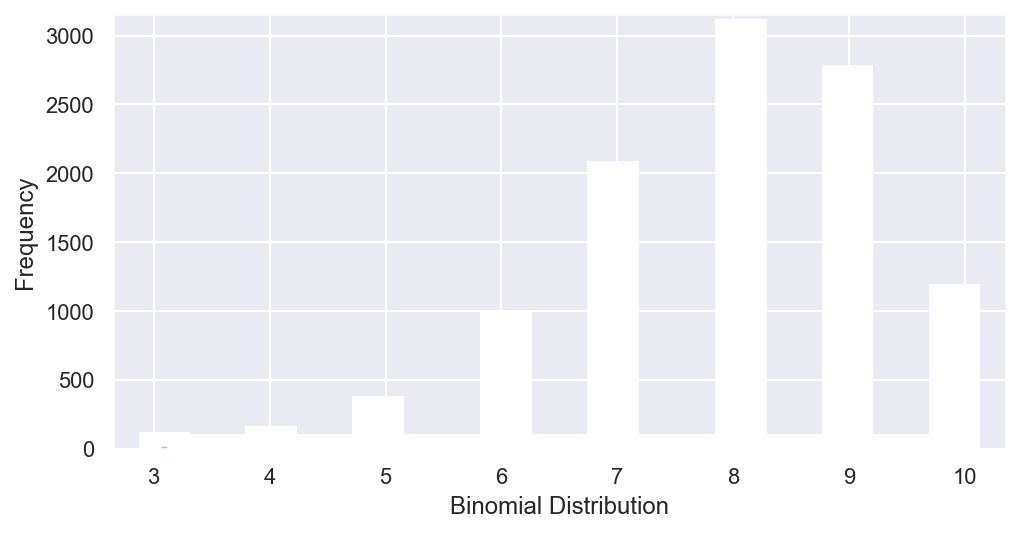

In [33]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

**Note** that since the probability of success was greater than $0.5$ the distribution is skewed towards the right side. Also, poisson distribution is a limiting case of a binomial distribution under the following conditions:

1. The number of trials is indefinitely large or $n → ∞$.
2. The probability of success for each trial is same and indefinitely small or $p →0$.
3. $np = λ$, is finite.

Normal distribution is another limiting form of binomial distribution under the following conditions:

1. The number of trials is indefinitely large, $n → ∞$.
2. Both $p$ and $q$ are not indefinitely small.

## 7. Bernoulli Distribution

A Bernoulli distribution has only two possible outcomes, namely $1$ (success) and $0$ (failure), and a single trial, for example, a coin toss. So the random variable $X$ which has a Bernoulli distribution can take value $1$ with the probability of success, $p$, and the value $0$ with the probability of failure, $q$ or $1-p$. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted ($n=1$). Its probability mass function is given by:


$$
f(k;p) = p^k(1-p)^{1-k} \quad \text{for} \ k \in \{0,1\}
$$

You can generate a bernoulli distributed discrete random variable using `scipy.stats` module's `bernoulli.rvs()` method which takes $p$ (probability of success) as a shape parameter. To shift distribution use the `loc` parameter. `size` decides the number of times to repeat the trials. If you want to maintain reproducibility, include a `random_state` argument assigned to a number.


In [21]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000,p=0.6)

Again visulaizing the distribution, you can observe that you have only two possible outcomes:


[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

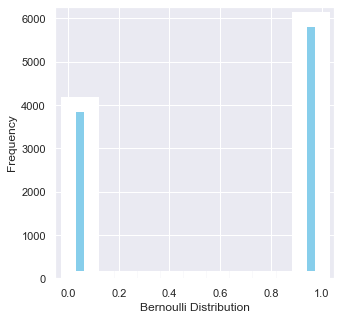

In [22]:
ax = sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Conclusion

Congrats, you have made it to the end of this tutorial! In this tutorial, you explored some commonly used probability distributions and learned to create and plot them in python. Although there are many other distributions to be explored, this will be sufficient for you to get started. Don't forget to check out python's `scipy` library which has other cool statistical functionalities. Happy exploring!

If you would like to learn more about probability in Python, take DataCamp's [Statistical Simulation in Python](https://www.datacamp.com/courses/statistical-simulation-in-python) course.

## References
- [Random Variables (Yale)](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm)
- [Poisson distribution](http://infogalactic.com/info/Poisson_distribution)
- [6 Common Probability Distributions every data science professional should know (By Radhika Nijhawan)](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)